# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10])) #instead of numpy array we could use strings,ecc.
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b   -3.656418
c   -1.140596
d   -5.703730
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018' #if I don't comment this line it gets overwritten by the following one
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00     8.798768
2018-11-20 14:45:00     8.883290
2018-11-21 14:45:00    11.795536
2018-11-22 14:45:00     9.051047
Freq: D, dtype: float64 

2018-11-19 14:45:00     8.798768
2018-11-20 14:45:00     8.883290
2018-11-21 14:45:00    11.795536
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df #without using print it's visualized even better


,A,B,C,D
2018-11-19 14:45:00,-0.363560,-0.045239,2.137844,1.098733
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,0.126954
2018-11-19 16:45:00,0.295765,-0.863225,-1.585777,-0.334335
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,-0.190669
2018-11-19 18:45:00,0.698539,-0.164365,-0.860307,-1.848018
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,-2.194887
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,2.510541
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,-0.620025
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,2.700529
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,-0.772640


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1., # 1 gets replicated to match the dimension
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-0.363560,-0.045239,2.137844,1.098733
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,0.126954
2018-11-19 16:45:00,0.295765,-0.863225,-1.585777,-0.334335
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,-0.190669
2018-11-19 18:45:00,0.698539,-0.164365,-0.860307,-1.848018


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,2.510541
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,-0.620025
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,2.700529
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,-0.772640


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values #returns a 2D numpy array

array([[-0.36355983, -0.04523891,  2.13784401,  1.09873283],
       [ 0.11634073,  1.24166195, -0.05099383,  0.12695355],
       [ 0.29576498, -0.86322515, -1.58577696, -0.33433465],
       [-0.52293087,  0.44312008, -0.8573778 , -0.19066927],
       [ 0.69853917, -0.16436506, -0.86030689, -1.84801776],
       [-2.10490314,  1.36201611, -0.70700305, -2.19488702],
       [-0.34404406,  0.3365038 ,  0.06231489,  2.51054134],
       [-1.07382842, -1.10759255,  1.09692043, -0.62002541],
       [ 0.33554962,  1.54959725, -0.03983597,  2.70052856],
       [ 0.45081579,  0.20778771, -0.32351919, -0.77263984]])

In [18]:
df.describe() #statistical values

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.251226,0.296027,-0.112773,0.047618
std,0.842046,0.899104,1.067132,1.638379
min,-2.104903,-1.107593,-1.585777,-2.194887
25%,-0.483088,-0.134584,-0.819784,-0.734486
50%,-0.113852,0.272146,-0.187257,-0.262502
75%,0.325603,1.042026,0.036777,0.855788
max,0.698539,1.549597,2.137844,2.700529


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,-0.363560,0.116341,0.295765,-0.522931,0.698539,-2.104903,-0.344044,-1.073828,0.335550,0.450816
B,-0.045239,1.241662,-0.863225,0.443120,-0.164365,1.362016,0.336504,-1.107593,1.549597,0.207788
C,2.137844,-0.050994,-1.585777,-0.857378,-0.860307,-0.707003,0.062315,1.096920,-0.039836,-0.323519
D,1.098733,0.126954,-0.334335,-0.190669,-1.848018,-2.194887,2.510541,-0.620025,2.700529,-0.772640


In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,1.098733,2.137844,-0.045239,-0.363560
2018-11-19 15:45:00,0.126954,-0.050994,1.241662,0.116341
2018-11-19 16:45:00,-0.334335,-1.585777,-0.863225,0.295765
2018-11-19 17:45:00,-0.190669,-0.857378,0.443120,-0.522931
2018-11-19 18:45:00,-1.848018,-0.860307,-0.164365,0.698539
2018-11-19 19:45:00,-2.194887,-0.707003,1.362016,-2.104903
2018-11-19 20:45:00,2.510541,0.062315,0.336504,-0.344044
2018-11-19 21:45:00,-0.620025,1.096920,-1.107593,-1.073828
2018-11-19 22:45:00,2.700529,-0.039836,1.549597,0.335550
2018-11-19 23:45:00,-0.772640,-0.323519,0.207788,0.450816


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 16:45:00,0.295765,-0.863225,-1.585777,-0.334335
2018-11-19 18:45:00,0.698539,-0.164365,-0.860307,-1.848018
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,-0.190669
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,-2.194887
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,-0.772640
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,0.126954
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,2.700529
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,2.510541
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,-0.620025
2018-11-19 14:45:00,-0.363560,-0.045239,2.137844,1.098733


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -0.363560
2018-11-19 15:45:00    0.116341
2018-11-19 16:45:00    0.295765
2018-11-19 17:45:00   -0.522931
2018-11-19 18:45:00    0.698539
2018-11-19 19:45:00   -2.104903
2018-11-19 20:45:00   -0.344044
2018-11-19 21:45:00   -1.073828
2018-11-19 22:45:00    0.335550
2018-11-19 23:45:00    0.450816
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -0.363560
2018-11-19 15:45:00    0.116341
2018-11-19 16:45:00    0.295765
2018-11-19 17:45:00   -0.522931
2018-11-19 18:45:00    0.698539
2018-11-19 19:45:00   -2.104903
2018-11-19 20:45:00   -0.344044
2018-11-19 21:45:00   -1.073828
2018-11-19 22:45:00    0.335550
2018-11-19 23:45:00    0.450816
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00 -0.363560 -0.045239  2.137844  1.098733
2018-11-19 15:45:00  0.116341  1.241662 -0.050994  0.126954
2018-11-19 16:45:00  0.295765 -0.863225 -1.585777 -0.334335
                            A         B         C         D
2018-11-19 14:45:00 -0.363560 -0.045239  2.137844  1.098733
2018-11-19 15:45:00  0.116341  1.241662 -0.050994  0.126954
2018-11-19 16:45:00  0.295765 -0.863225 -1.585777 -0.334335


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.363560
B   -0.045239
C    2.137844
D    1.098733
Name: 2018-11-19 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#df.loc[:,['A','B','D']]

,A,B
2018-11-19 14:45:00,-0.363560,-0.045239
2018-11-19 15:45:00,0.116341,1.241662
2018-11-19 16:45:00,0.295765,-0.863225
2018-11-19 17:45:00,-0.522931,0.443120
2018-11-19 18:45:00,0.698539,-0.164365
2018-11-19 19:45:00,-2.104903,1.362016
2018-11-19 20:45:00,-0.344044,0.336504
2018-11-19 21:45:00,-1.073828,-1.107593
2018-11-19 22:45:00,0.335550,1.549597
2018-11-19 23:45:00,0.450816,0.207788


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,0.698539,-0.164365
2018-11-19 19:45:00,-2.104903,1.362016
2018-11-19 20:45:00,-0.344044,0.336504


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.11634073469194446
0.11634073469194446


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.522931
B    0.443120
C   -0.857378
D   -0.190669
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00 -0.522931  0.443120
2018-11-19 18:45:00  0.698539 -0.164365


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,0.116341,-0.050994
2018-11-19 16:45:00,0.295765,-1.585777
2018-11-19 18:45:00,0.698539,-0.860307


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  0.116341  1.241662 -0.050994  0.126954
2018-11-19 16:45:00  0.295765 -0.863225 -1.585777 -0.334335 

                            B         C
2018-11-19 14:45:00 -0.045239  2.137844
2018-11-19 15:45:00  1.241662 -0.050994
2018-11-19 16:45:00 -0.863225 -1.585777
2018-11-19 17:45:00  0.443120 -0.857378
2018-11-19 18:45:00 -0.164365 -0.860307
2018-11-19 19:45:00  1.362016 -0.707003
2018-11-19 20:45:00  0.336504  0.062315
2018-11-19 21:45:00 -1.107593  1.096920
2018-11-19 22:45:00  1.549597 -0.039836
2018-11-19 23:45:00  0.207788 -0.323519


In [31]:
# selecting an individual element by position
df.iloc[1,1]


1.2416619522437726

In [32]:
# selecting an individual element by position
df.iat[1,1]


1.2416619522437726

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,0.126954
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,-0.190669
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,-2.194887
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,2.510541
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,2.700529
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,-0.772640


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,NaN,2.137844,1.098733
2018-11-19 15:45:00,0.116341,1.241662,NaN,0.126954
2018-11-19 16:45:00,0.295765,NaN,NaN,NaN
2018-11-19 17:45:00,NaN,0.443120,NaN,NaN
2018-11-19 18:45:00,0.698539,NaN,NaN,NaN
2018-11-19 19:45:00,NaN,1.362016,NaN,NaN
2018-11-19 20:45:00,NaN,0.336504,0.062315,2.510541
2018-11-19 21:45:00,NaN,NaN,1.096920,NaN
2018-11-19 22:45:00,0.335550,1.549597,NaN,2.700529
2018-11-19 23:45:00,0.450816,0.207788,NaN,NaN


### Setting

Combination of selection and setting of values

In [35]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brand new column PRETEND THE COLUMS ALREADY EXISTS AND ACCESS TO IT
df['E'] = np.arange(len(df))*0.5

# defining a brand new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [36]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.045239,2.137844,5,0.0,0,1.000000
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,5,0.5,2,0.999962
2018-11-19 16:45:00,0.295765,-0.863225,-1.585777,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,5,1.5,6,0.999657
2018-11-19 18:45:00,0.698539,-0.164365,-0.860307,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,5,3.5,14,0.998135
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,5,4.0,16,0.997564
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,5,4.5,18,0.996917


In [37]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.045239,-2.137844,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.116341,-1.241662,-0.050994,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-0.295765,-0.863225,-1.585777,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-0.522931,-0.443120,-0.857378,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.698539,-0.164365,-0.860307,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-2.104903,-1.362016,-0.707003,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.344044,-0.336504,-0.062315,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-1.073828,-1.107593,-1.096920,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.335550,-1.549597,-0.039836,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.450816,-0.207788,-0.323519,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
#df.drop(columns=['E prime']) #doesn't work in lab but works in the pc

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,-0.045239,2.137844,5,0.0,1.000000
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,5,0.5,0.999962
2018-11-19 16:45:00,0.295765,-0.863225,-1.585777,5,1.0,0.999848
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,5,1.5,0.999657
2018-11-19 18:45:00,0.698539,-0.164365,-0.860307,5,2.0,0.999391
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,5,2.5,0.999048
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,5,3.0,0.998630
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,5,3.5,0.998135
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,5,4.0,0.997564
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,5,4.5,0.996917


In [39]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.045239,2.137844,5,0.0,0,1.000000
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,5,3.5,14,0.998135
2018-11-19 22:45:00,0.335550,1.549597,-0.039836,5,4.0,16,0.997564
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.045239,2.137844,5,0.0,0,1.000000
2018-11-19 15:45:00,0.116341,1.241662,-0.050994,5,0.5,2,0.999962
2018-11-19 16:45:00,0.295765,-0.863225,-1.585777,5,1.0,4,0.999848
2018-11-19 17:45:00,-0.522931,0.443120,-0.857378,5,1.5,6,0.999657
2018-11-19 18:45:00,0.698539,-0.164365,-0.860307,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.104903,1.362016,-0.707003,5,2.5,10,0.999048
2018-11-19 20:45:00,-0.344044,0.336504,0.062315,5,3.0,12,0.998630
2018-11-19 21:45:00,-1.073828,-1.107593,1.096920,5,3.5,14,0.998135
2018-11-19 23:45:00,0.450816,0.207788,-0.323519,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,2.137844,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.116341,1.241662,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.295765,NaN,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,0.443120,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.698539,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,1.362016,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,0.336504,0.062315,5,3.0,12.0,0.998630
2018-11-19 21:45:00,NaN,NaN,1.096920,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.335550,1.549597,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.450816,0.207788,NaN,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [43]:
# getting a mask
df_wNan.isna() #DOESN'T WORK
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,True,True,False,False,True,True,False
2018-11-19 15:45:00,False,False,True,False,False,False,False
2018-11-19 16:45:00,False,True,True,False,False,False,False
2018-11-19 17:45:00,True,False,True,False,False,False,False
2018-11-19 18:45:00,False,True,True,False,False,False,False
2018-11-19 19:45:00,True,False,True,False,False,False,False
2018-11-19 20:45:00,True,False,False,False,False,False,False
2018-11-19 21:45:00,True,True,False,False,False,False,False
2018-11-19 22:45:00,False,False,True,False,False,False,False
2018-11-19 23:45:00,False,False,True,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.000000,2.137844,5,0.0,0.0,1.000000
2018-11-19 15:45:00,0.116341,1.241662,0.000000,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.295765,0.000000,0.000000,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.000000,0.443120,0.000000,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.698539,0.000000,0.000000,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.000000,1.362016,0.000000,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.000000,0.336504,0.062315,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.000000,0.000000,1.096920,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.335550,1.549597,0.000000,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.450816,0.207788,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,NaN,2.137844,5,NaN,NaN,1.000000
2018-11-19 15:45:00,0.116341,1.241662,2.137844,5,0.5,2.0,0.999962
2018-11-19 16:45:00,0.295765,1.241662,2.137844,5,1.0,4.0,0.999848
2018-11-19 17:45:00,0.295765,0.443120,2.137844,5,1.5,6.0,0.999657
2018-11-19 18:45:00,0.698539,0.443120,2.137844,5,2.0,8.0,0.999391
2018-11-19 19:45:00,0.698539,1.362016,2.137844,5,2.5,10.0,0.999048
2018-11-19 20:45:00,0.698539,0.336504,0.062315,5,3.0,12.0,0.998630
2018-11-19 21:45:00,0.698539,0.336504,1.096920,5,3.5,14.0,0.998135
2018-11-19 22:45:00,0.335550,1.549597,1.096920,5,4.0,16.0,0.997564
2018-11-19 23:45:00,0.450816,0.207788,1.096920,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.214870
B          0.296027
C         -0.112773
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    1.156086
2018-11-19 15:45:00    1.400996
2018-11-19 16:45:00    1.263802
2018-11-19 17:45:00    1.794638
2018-11-19 18:45:00    2.239037
2018-11-19 19:45:00    2.435594
2018-11-19 20:45:00    3.007629
2018-11-19 21:45:00    3.201948
2018-11-19 22:45:00    3.977554
2018-11-19 23:45:00    4.118857
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.045239,2.137844,5,0.0,0,1.000000
2018-11-19 15:45:00,0.116341,1.196423,2.086850,10,0.5,2,1.999962
2018-11-19 16:45:00,0.412106,0.333198,0.501073,15,1.5,6,2.999810
2018-11-19 17:45:00,-0.110825,0.776318,-0.356305,20,3.0,12,3.999467
2018-11-19 18:45:00,0.587714,0.611953,-1.216611,25,5.0,20,4.998858
2018-11-19 19:45:00,-1.517189,1.973969,-1.923615,30,7.5,30,5.997906
2018-11-19 20:45:00,-1.861233,2.310473,-1.861300,35,10.5,42,6.996536
2018-11-19 21:45:00,-2.935062,1.202880,-0.764379,40,14.0,56,7.994670
2018-11-19 22:45:00,-2.599512,2.752478,-0.804215,45,18.0,72,8.992234
2018-11-19 23:45:00,-2.148696,2.960265,-1.127734,50,22.5,90,9.989152


In [48]:
df.apply(lambda x: x.max() - x.min())

A           2.803442
B           2.657190
C           3.723621
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [49]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -0.045239
2018-11-19 15:45:00    1.358003
2018-11-19 16:45:00   -0.567460
2018-11-19 17:45:00   -0.079811
2018-11-19 18:45:00    0.534174
2018-11-19 19:45:00   -0.742887
2018-11-19 20:45:00   -0.007540
2018-11-19 21:45:00   -2.181421
2018-11-19 22:45:00    1.885147
2018-11-19 23:45:00    0.658603
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [50]:
#file_name="/home/spiro/home/polatoc/data/data_000636.txt"
file_name="C:/Users/CP/data/data_000636.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,60,3869187117,788,15
1,1,0,63,3869187117,787,23
2,1,0,64,3869187117,786,12
3,1,1,1,3869187117,1078,14
4,1,0,27,3869187117,1080,9
5,1,0,49,3869187117,1077,3
6,1,1,11,3869187117,1078,19
7,1,0,139,3869187117,1083,0
8,1,0,32,3869187117,1081,27
9,1,0,50,3869187117,1078,24


Let's know do some operations among (elements of) columns

In [51]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [52]:
# the old slooow way
#def conversion(data):
#    result=[]
#    for i in range(len(data)): 
#        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
#    return result
#
#data['timens']=conversion(data)

In [53]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,60,3869187117,788,15,19712.500000
1,1,0,63,3869187117,787,23,19694.166667
2,1,0,64,3869187117,786,12,19660.000000
3,1,1,1,3869187117,1078,14,26961.666667
4,1,0,27,3869187117,1080,9,27007.500000
5,1,0,49,3869187117,1077,3,26927.500000
6,1,1,11,3869187117,1078,19,26965.833333
7,1,0,139,3869187117,1083,0,27075.000000
8,1,0,32,3869187117,1081,27,27047.500000
9,1,0,50,3869187117,1078,24,26970.000000


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [54]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.930560,-1.579248,1.129421,2.325322
1,0.180646,0.873530,0.028070,-1.220197
2,-0.744806,0.774820,0.118357,-0.118610
3,0.075511,0.494189,-0.983937,-0.803572
4,0.841631,0.238725,-0.449488,-0.838221
5,0.159782,1.211108,0.629718,1.126240
6,-0.538288,0.732061,0.471228,-0.339578
7,-0.378218,-0.434066,1.287792,1.336138
8,-0.169368,0.281209,0.025828,-0.535624
9,2.164224,0.176587,-1.914116,0.961344


In [55]:
# divide it into pieces row-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.930560 -1.579248  1.129421  2.325322
 1  0.180646  0.873530  0.028070 -1.220197
 2 -0.744806  0.774820  0.118357 -0.118610,
           0         1         2         3
 3  0.075511  0.494189 -0.983937 -0.803572
 4  0.841631  0.238725 -0.449488 -0.838221
 5  0.159782  1.211108  0.629718  1.126240
 6 -0.538288  0.732061  0.471228 -0.339578,
           0         1         2         3
 7 -0.378218 -0.434066  1.287792  1.336138
 8 -0.169368  0.281209  0.025828 -0.535624
 9  2.164224  0.176587 -1.914116  0.961344]

In [56]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.930560,-1.579248,1.129421,2.325322
1,0.180646,0.873530,0.028070,-1.220197
2,-0.744806,0.774820,0.118357,-0.118610
3,0.075511,0.494189,-0.983937,-0.803572
4,0.841631,0.238725,-0.449488,-0.838221
5,0.159782,1.211108,0.629718,1.126240
6,-0.538288,0.732061,0.471228,-0.339578
7,-0.378218,-0.434066,1.287792,1.336138
8,-0.169368,0.281209,0.025828,-0.535624
9,2.164224,0.176587,-1.914116,0.961344


In [57]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.930560,-1.579248,1.129421,2.325322
1,0.180646,0.873530,0.028070,-1.220197
2,-0.744806,0.774820,0.118357,-0.118610
3,0.075511,0.494189,-0.983937,-0.803572
4,0.841631,0.238725,-0.449488,-0.838221
5,0.159782,1.211108,0.629718,1.126240
6,-0.538288,0.732061,0.471228,-0.339578
7,-0.378218,-0.434066,1.287792,1.336138
8,-0.169368,0.281209,0.025828,-0.535624
9,2.164224,0.176587,-1.914116,0.961344


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [58]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [59]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.085047,-0.990806
1,bar,one,-0.082842,0.129799
2,foo,two,-0.279713,-1.984522
3,bar,three,0.408089,-1.302482
4,foo,two,1.006622,2.658542
5,bar,two,0.094410,1.600222
6,foo,one,-0.331625,-0.848948
7,foo,three,-0.094653,0.395510


In [60]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
B,,
one,-0.329420,-1.709954
three,0.313436,-0.906973
two,0.821319,2.274241


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [126]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one      -0.197455
       two      -1.008492
baz    one       1.545866
       two      -1.923333
foo    one       0.476980
       two       0.687876
qux    one      -1.301242
       two      -0.600828
dtype: float64


In [127]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.366791  0.991447
    three  1.067651  0.388131
    two    0.374226 -0.160319
foo one    0.589433 -0.819698
    three  1.047071  0.194048
    two   -1.069060  2.373597

In [128]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -1.366791
            D    0.991447
     three  C    1.067651
            D    0.388131
     two    C    0.374226
            D   -0.160319
foo  one    C    0.589433
            D   -0.819698
     three  C    1.047071
            D    0.194048
     two    C   -1.069060
            D    2.373597
dtype: float64

## Plotting

Just a preview, more on the next lab class!

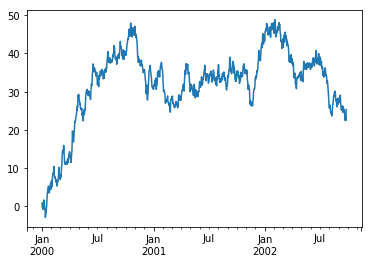

In [129]:
from matplotlib import pyplot as plt
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

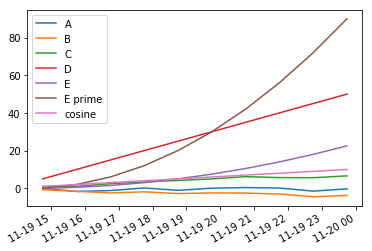

In [130]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')